In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 532M/534M [00:24<00:00, 24.5MB/s]
100% 534M/534M [00:24<00:00, 22.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/vegetable-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
#from keras.utils import load_img, img_to_array
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

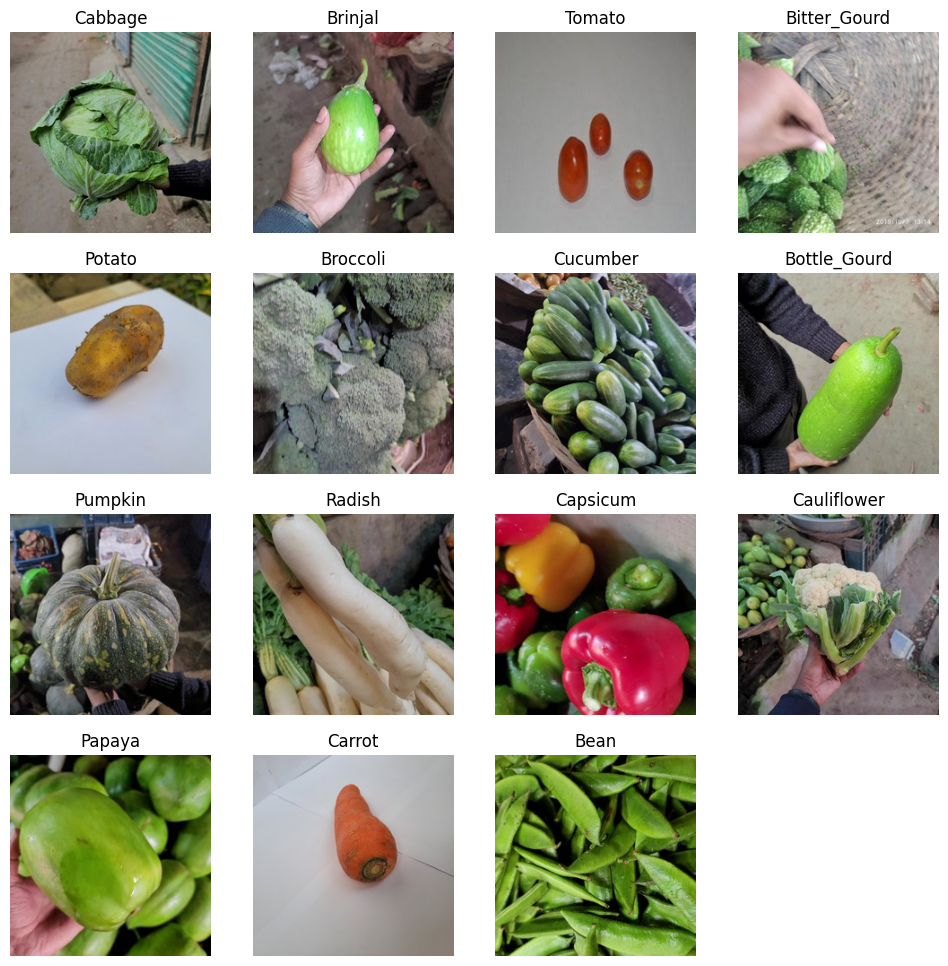

In [ ]:
# Let's plot a few images
train_path = "/content/Vegetable Images/train"
validation_path = "/content/Vegetable Images/validation"
test_path = "/content/Vegetable Images/test"

image_categories = os.listdir('/content/Vegetable Images/train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)


In [ ]:
print(image_categories)

['Cabbage', 'Brinjal', 'Tomato', 'Bitter_Gourd', 'Potato', 'Broccoli', 'Cucumber', 'Bottle_Gourd', 'Pumpkin', 'Radish', 'Capsicum', 'Cauliflower', 'Papaya', 'Carrot', 'Bean']


In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [ ]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=10) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=100,
                 verbose=1,
                 validation_data=val_image_generator,
                 steps_per_epoch = 15000//32,
                 validation_steps = 3000//32,
                 callbacks=early_stopping)

Epoch 1/100
468/468 [==============================] - 53s 87ms/step - loss: 1.3544 - accuracy: 0.5651 - val_loss: 0.5109 - val_accuracy: 0.8488
Epoch 2/100
468/468 [==============================] - 41s 87ms/step - loss: 0.6075 - accuracy: 0.8027 - val_loss: 0.3718 - val_accuracy: 0.8894
Epoch 3/100
468/468 [==============================] - 36s 76ms/step - loss: 0.3794 - accuracy: 0.8793 - val_loss: 0.3289 - val_accuracy: 0.9012
Epoch 4/100
468/468 [==============================] - 37s 79ms/step - loss: 0.2721 - accuracy: 0.9121 - val_loss: 0.2065 - val_accuracy: 0.9399
Epoch 5/100
468/468 [==============================] - 40s 85ms/step - loss: 0.1915 - accuracy: 0.9352 - val_loss: 0.2290 - val_accuracy: 0.9358
Epoch 6/100
468/468 [==============================] - 36s 76ms/step - loss: 0.1884 - accuracy: 0.9393 - val_loss: 0.2655 - val_accuracy: 0.9291
Epoch 7/100
468/468 [==============================] - 36s 78ms/step - loss: 0.1328 - accuracy: 0.9565 - val_loss: 0.3791 - val_ac

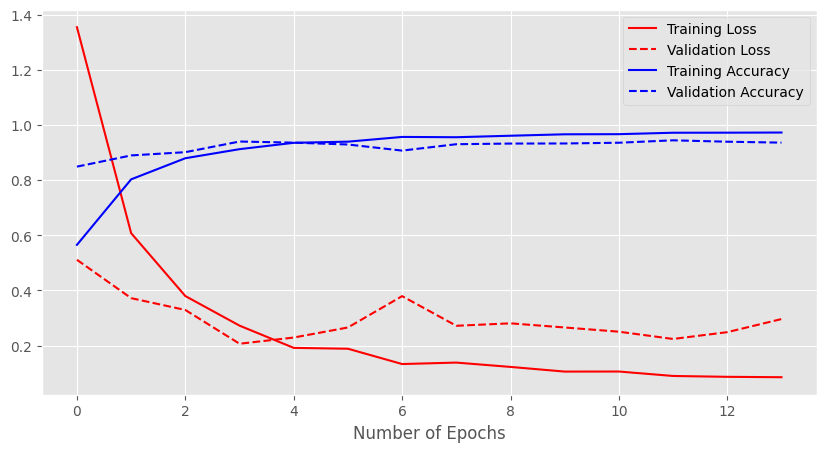

In [ ]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 6s 61ms/step - loss: 0.2393 - accuracy: 0.9430


[0.23929758369922638, 0.9430000185966492]

In [ ]:
# Testing the Model
test_image_path = '/content/Vegetable Images/test/Broccoli/1011.jpg'

1/1 [==============================] - 0s 175ms/step


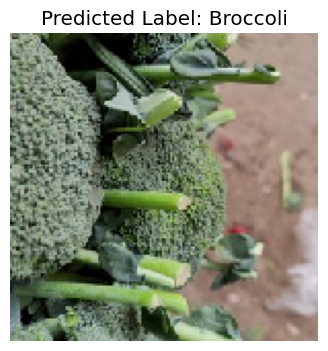

In [ ]:
# Testing the Model
test_image_path = '/content/Vegetable Images/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}".format(predicted_vegetable))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path)

1/1 [==============================] - 0s 19ms/step


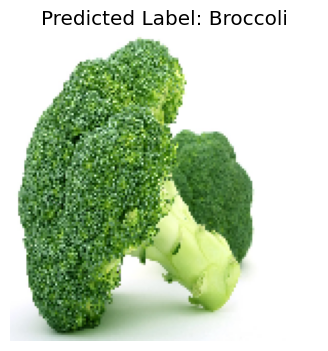

In [ ]:
external_image_path_1 = "/content/b.jpg"
generate_predictions(external_image_path_1)

1/1 [==============================] - 0s 30ms/step


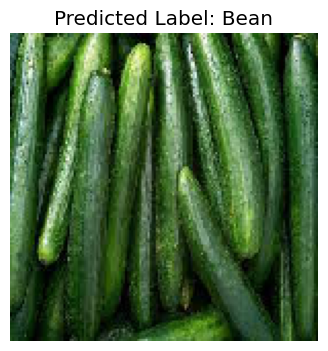

In [ ]:
external_image_path_1 = "/content/cucumber.jpg"
generate_predictions(external_image_path_1)

1/1 [==============================] - 0s 19ms/step


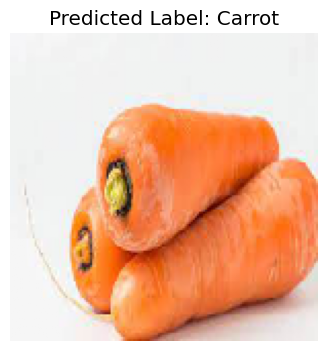

In [ ]:
external_image_path_1 = "/content/carrot.jpg"
generate_predictions(external_image_path_1)

1/1 [==============================] - 0s 30ms/step


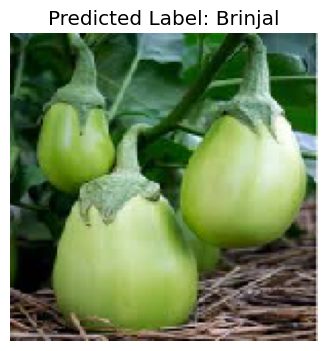

In [ ]:
external_image_path_1 = "/content/brinjal.jpg"
generate_predictions(external_image_path_1)